# Business Informatics
## 3rd assignment: Critical Path Method
#### submitted by: Maximilian3141
#### Date: 2023.11.30 

### Tasks:
1.  Draw the project dependency graph
2.  Determine 2-3 start-end path with total path duration
3.  Apply CP algorithm to assign ES, EF values for each task
4.  What is the critical path and the total duration of the project?
5.  Determine LS, LF values for each task





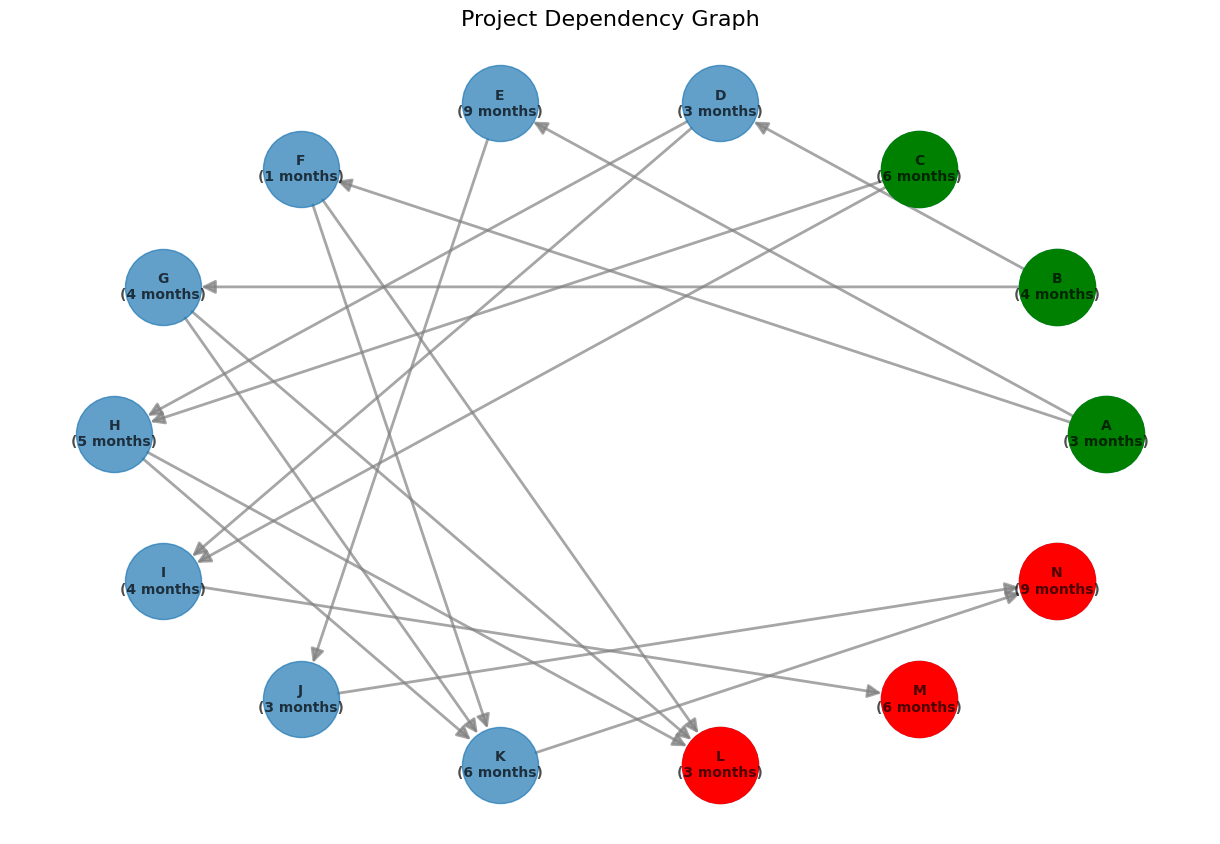

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Define tasks and their dependencies
tasks = {
    'A': {'duration': 3, 'dependencies': []},
    'B': {'duration': 4, 'dependencies': []},
    'C': {'duration': 6, 'dependencies': []},
    "D": {'duration': 3, 'dependencies': ["B"]},
    "E": {'duration': 9, 'dependencies': ["A"]},
    "F": {'duration': 1, 'dependencies': ["A"]},
    "G": {'duration': 4, 'dependencies': ["B"]},
    "H": {'duration': 5, 'dependencies': ["C","D"]},
    "I": {'duration': 4, 'dependencies': ["C","D"]},
    "J": {'duration': 3, 'dependencies': ["E"]},
    "K": {'duration': 6, 'dependencies': ["F","G","H"]},
    "L": {'duration': 3, 'dependencies': ["F","G","H"]},
    "M": {'duration': 6, 'dependencies': ["I"]},
    "N": {'duration': 9, 'dependencies': ["J","K"]},
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes with attributes
for task, info in tasks.items():
    G.add_node(task, duration=info['duration'])

# Add edges representing dependencies
for task, info in tasks.items():
    for dependency in info['dependencies']:
        G.add_edge(dependency, task)

# Identify starting points and endpoints
starting_points = [node for node in G.nodes if G.in_degree(node) == 0]
endpoints = [node for node in G.nodes if G.out_degree(node) == 0]

# Use circular_layout for non-overlapping layout
pos = nx.circular_layout(G)

# Draw the graph with improved layout and styling
labels = {node: f"{node}\n({tasks[node]['duration']} months)" for node in G.nodes}

plt.figure(figsize=(12, 8))

# Draw nodes and edges
nx.draw(
    G,
    pos,
    with_labels=True,
    labels=labels,
    node_size=3000,
    font_size=10,
    font_color='black',
    font_weight='bold',
    arrowsize=20,
    edge_color='gray',
    width=2,
    alpha=0.7,
)

# Color-code starting points and endpoints
nx.draw_networkx_nodes(G, pos, nodelist=starting_points, node_color='green', node_size=3000)
nx.draw_networkx_nodes(G, pos, nodelist=endpoints, node_color='red', node_size=3000)

plt.title('Project Dependency Graph', fontsize=16)
plt.show()


In [24]:
# Calculate early start and finish times
early_start_times = {}
early_finish_times = {}
for node in nx.topological_sort(G):
    early_start_times[node] = max([early_finish_times[predecessor] for predecessor in G.predecessors(node)], default=0)
    early_finish_times[node] = early_start_times[node] + G.nodes[node]['duration']

# Calculate project duration
project_duration = max(early_finish_times.values())

# Calculate late start and finish times
late_start_times = {}
late_finish_times = {}
for node in reversed(list(nx.topological_sort(G))):
    late_finish_times[node] = min([late_start_times[successor] for successor in G.successors(node)], default=project_duration)
    late_start_times[node] = late_finish_times[node] - G.nodes[node]['duration']

# Calculate total float for each activity
total_float = {node: late_start_times[node] - early_start_times[node] for node in G.nodes}

# Identify critical path activities
critical_path = [node for node, float_value in total_float.items() if float_value == 0]

print(f"Early Start Times: {early_start_times}")
print(f"Early Finish Times: {early_finish_times}")
print(f"Late Start Times: {late_start_times}")
print(f"Late Finish Times: {late_finish_times}")
print(f"Total Float: {total_float}")
print(f"Critical Path: {critical_path}")
print(f"Total Duration of the Project: {project_duration} months")


Early Start Times: {'A': 0, 'B': 0, 'C': 0, 'E': 3, 'F': 3, 'D': 4, 'G': 4, 'J': 12, 'H': 7, 'I': 7, 'K': 12, 'L': 12, 'M': 11, 'N': 18}
Early Finish Times: {'A': 3, 'B': 4, 'C': 6, 'E': 12, 'F': 4, 'D': 7, 'G': 8, 'J': 15, 'H': 12, 'I': 11, 'K': 18, 'L': 15, 'M': 17, 'N': 27}
Late Start Times: {'N': 18, 'M': 21, 'L': 24, 'K': 12, 'I': 17, 'H': 7, 'J': 15, 'G': 8, 'D': 4, 'F': 11, 'E': 6, 'C': 1, 'B': 0, 'A': 3}
Late Finish Times: {'N': 27, 'M': 27, 'L': 27, 'K': 18, 'I': 21, 'H': 12, 'J': 18, 'G': 12, 'D': 7, 'F': 12, 'E': 15, 'C': 7, 'B': 4, 'A': 6}
Total Float: {'A': 3, 'B': 0, 'C': 1, 'D': 0, 'E': 3, 'F': 8, 'G': 4, 'H': 0, 'I': 10, 'J': 3, 'K': 0, 'L': 12, 'M': 10, 'N': 0}
Critical Path: ['B', 'D', 'H', 'K', 'N']
Total Duration of the Project: 27 months


### Solution:
Start points are green in the graph (A, B, C).

End point are red in the graph (L, M, N).

Critical Path: B, D, H, K, N 

Total Duration of the Project: 27 months